In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = TRUE)


ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/test/traffic.csv')  # Replace 'your_file.csv' with the actual file path

# Display the first few rows of the DataFrame to understand its structure
print(data.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/traffic.csv'

In [ ]:
#Preprocessing handling NULL Values
data.fillna(0)

data['DateTime'] = pd.to_datetime(data['DateTime'])

# Feature engineering: Extract DateTime features
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year
data["Date"] = data['DateTime'].dt.day
# Feature engineering: Interaction Features
# Example: Interaction between Hour and DayOfWeek
data['Hour_DayOfWeek'] = data['Hour'] * data['DayOfWeek']

# Feature engineering: Junction Features
# Example: Overall traffic situation across all junctions just making another feature to inc little noise so data should not overfit the model
# data['Overall_Traffic'] = data[['Junction_1', 'Junction_2', 'Junction_3', 'Junction_4']].sum(axis=1)

# Feature engineering: Temporal Features
# Example: Trend over time
# data['Trend'] = data.index

# Display the updated DataFrame with engineered features
print(data.head())


             DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
0 2015-11-01 00:00:00         1        15  20151101001     0          6   
1 2015-11-01 01:00:00         1        13  20151101011     1          6   
2 2015-11-01 02:00:00         1        10  20151101021     2          6   
3 2015-11-01 03:00:00         1         7  20151101031     3          6   
4 2015-11-01 04:00:00         1         9  20151101041     4          6   

   Month  Year  Date  Hour_DayOfWeek  
0     11  2015     1               0  
1     11  2015     1               6  
2     11  2015     1              12  
3     11  2015     1              18  
4     11  2015     1              24  


In [96]:
from sklearn.model_selection import train_test_split


# print(data)
def Normalize(df):
    # Extract non-numerical features
    # non_numerical_cols = ['DateTime', 'Hour', 'Junction', 'Date', 'DayOfWeek','Month','Year']

    # Normalize numerical features
    numerical_cols = df.select_dtypes(include=['int64', 'float64','int32','float32']).columns
    print(numerical_cols)
    # numerical_cols = [col for col in numerical_cols if col not in non_numerical_cols]
    df_numerical = df[numerical_cols]
    df_normalized = (df_numerical - df_numerical.mean()) / df_numerical.std()

    # Concatenate normalized numerical features with the non-numerical features
    # df_normalized = pd.concat([df[non_numerical_cols], df_normalized], axis=1)

    return df_normalized


# Normalize all features including the target variable (Vehicles)
# data_normalized, mean_data, std_data = Normalize(data)
# # Define features (X) and target variable (y)
# X = data.drop(columns=['Vehicles', 'DateTime', 'ID'])  # Exclude 'Vehicles' (target variable), 'DateTime', and 'ID' columns
# y = data['Vehicles']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Display the shapes of the training and testing sets
# print("Training set shape:", X_train.shape, y_train.shape)
# print("Testing set shape:", X_test.shape, y_test.shape)


                 DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
0     2015-11-01 00:00:00         1        15  20151101001     0          6   
1     2015-11-01 01:00:00         1        13  20151101011     1          6   
2     2015-11-01 02:00:00         1        10  20151101021     2          6   
3     2015-11-01 03:00:00         1         7  20151101031     3          6   
4     2015-11-01 04:00:00         1         9  20151101041     4          6   
...                   ...       ...       ...          ...   ...        ...   
48115 2017-06-30 19:00:00         4        11  20170630194    19          4   
48116 2017-06-30 20:00:00         4        30  20170630204    20          4   
48117 2017-06-30 21:00:00         4        16  20170630214    21          4   
48118 2017-06-30 22:00:00         4        22  20170630224    22          4   
48119 2017-06-30 23:00:00         4        12  20170630234    23          4   

       Month  Year  Date  Hour_DayOfWeek  
0       

In [111]:
# Display descriptive statistics of the features
print("Descriptive Statistics of Features:")
print(data.describe())
# This Is Describing overall statas of the data so that we can easily see the trend and using that we can increase accuracy !!

Descriptive Statistics of Features:
                            DateTime      Junction      Vehicles  \
count                          48120  48120.000000  48120.000000   
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334   
min              2015-11-01 00:00:00      1.000000      1.000000   
25%              2016-04-16 01:45:00      1.000000      9.000000   
50%              2016-09-30 03:30:00      2.000000     15.000000   
75%              2017-02-25 16:00:00      3.000000     29.000000   
max              2017-06-30 23:00:00      4.000000    180.000000   
std                              NaN      0.966955     20.750063   

                 ID          Hour     DayOfWeek         Month          Year  \
count  4.812000e+04  48120.000000  48120.000000  48120.000000  48120.000000   
mean   2.016330e+10     11.500000      2.996010      5.884289   2016.269825   
min    2.015110e+10      0.000000      0.000000      1.000000   2015.000000   
25%    2.016042e+10      5.750000  

In [112]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        #debugging Ke liye tha
        # print(X.shape)
        # Convert data types to float64
        # X = X.astype(np.float64)
        # y = y.astype(np.float64)

        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        print(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            # Compute predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Debug print statements
            # print("dw:", dw)
            # print("db:", db)

            # Check for NaN or infinite values
            if np.isnan(dw).any() or np.isinf(dw).any() or np.isnan(db) or np.isinf(db):
                raise ValueError("Invalid values encountered during gradient descent.")

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db


    def predict(self, X):
        # Convert data types to float64
        X = X.astype(np.float64)

        return np.dot(X, self.weights) + self.bias


In [98]:
from sklearn.metrics import mean_squared_error

def calculate_mse(y_true, y_pred):
    # for i in range(len(y_pred)):
    #   print(np.array(y_pred)[i],np.array(y_true)[i])
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values

    Returns:
    - mse: float, the mean squared error
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse


In [99]:
# Normalize all features including the target variable (Vehicles)
data_normalized = Normalize(data)


# Split the dataset into features (X) and the target variable (y)
X = data_normalized.drop(['Vehicles'], axis=1)
y = data_normalized['Vehicles']
print(X.shape)

# Split the normalized data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("ssn",X_train.shape)
# Convert DataFrame to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()

# Initialize and train the model
learning_rates = [0.682]  # Try different learning rates ye to hyperparameter hai
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = LinearRegressionScratch(learning_rate=lr, n_iterations=1000)
    model.fit(X_train_np, y_train_np)

    # Make predictions
    y_pred_train = model.predict(X_train_np)
    y_pred_test = model.predict(X_test_np)

    # Evaluate the model
    mse_train = calculate_mse(y_train, y_pred_train)
    mse_test = calculate_mse(y_test, y_pred_test)

    print("Mean Squared Error (MSE) - Train:", mse_train)
    print("Mean Squared Error (MSE) - Test:", mse_test)



Index(['Junction', 'Vehicles', 'ID', 'Hour', 'DayOfWeek', 'Month', 'Year',
       'Date', 'Hour_DayOfWeek'],
      dtype='object')
(48120, 8)
ssn (38496, 8)
Training with learning rate: 0.682
(38496, 8)
8
Mean Squared Error (MSE) - Train: 0.40084010287716193
Mean Squared Error (MSE) - Test: 0.37686244861187385


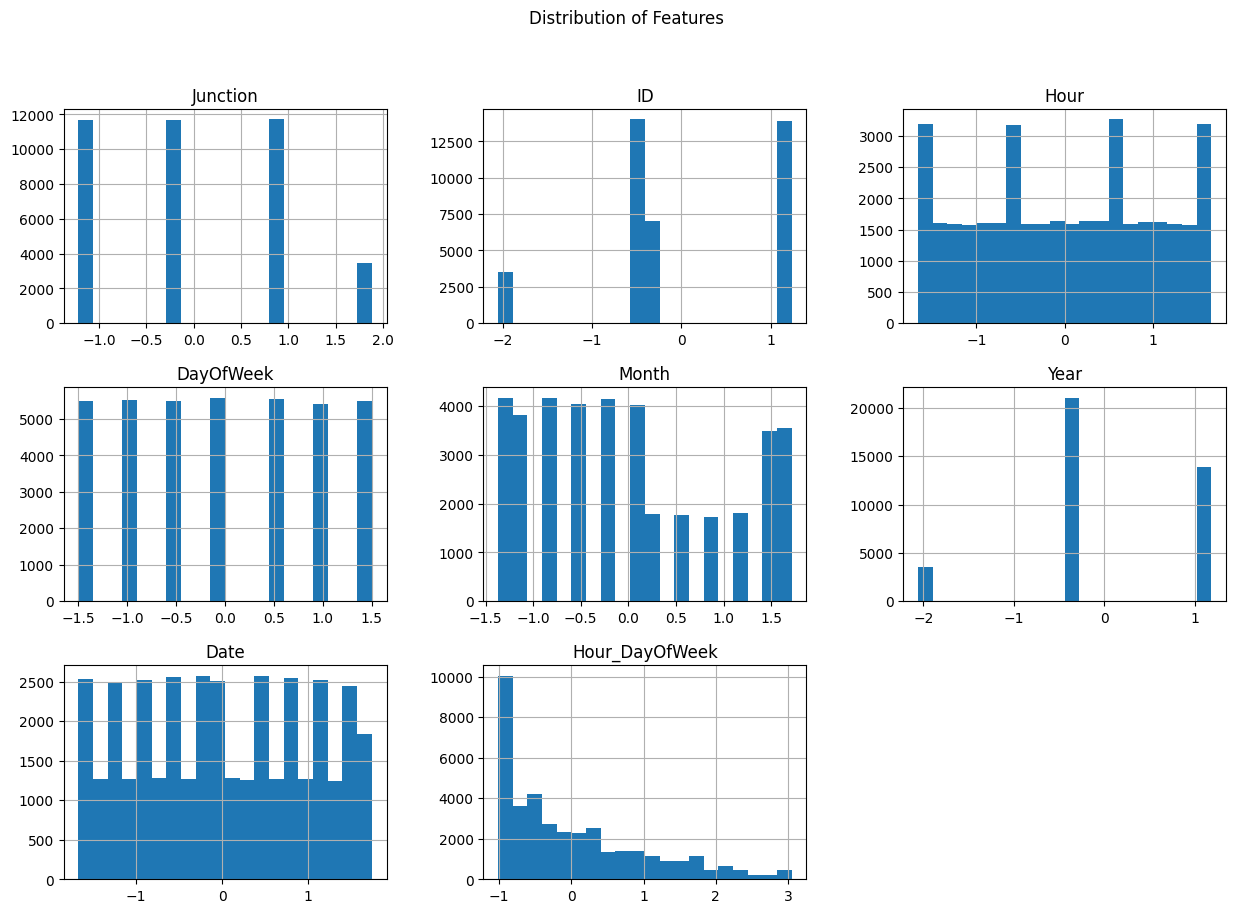

In [101]:
import matplotlib.pyplot as plt

# Visualize the distribution of features using histograms
X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Features")
plt.show()


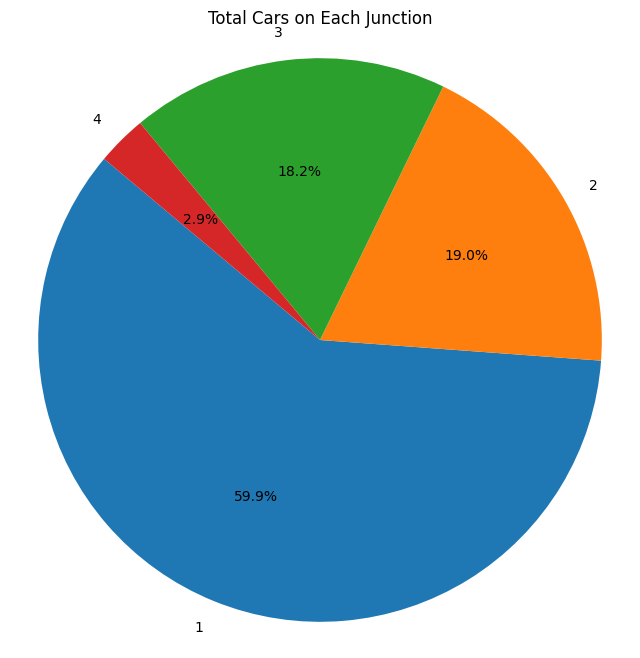

In [113]:
junction_totals = data.groupby('Junction')['Vehicles'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(junction_totals, labels=junction_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Cars on Each Junction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

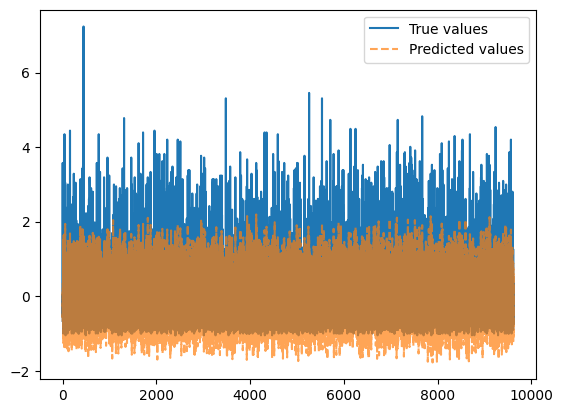

In [102]:
import matplotlib.pyplot as plt

# Plot true values
plt.plot(list(y_test), label='True values')

# Plot predicted values with reduced transparency
plt.plot(list(y_pred_test), linestyle='dashed', label='Predicted values', alpha=0.7)

# Add legend
plt.legend()

# Show plot
plt.show()


In [103]:
import pandas as pd

# Load the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/test/traffic.csv')  # Replace 'your_file.csv' with the actual file path

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [104]:
import pandas as pd
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Feature engineering: Extract DateTime features
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month
data['Year'] = data['DateTime'].dt.year
data["Date"] = data['DateTime'].dt.day
# Feature engineering: Interaction Features
# Example: Interaction between Hour and DayOfWeek
data['Hour_DayOfWeek'] = data['Hour'] * data['DayOfWeek']

# Feature engineering: Junction Features
# Example: Overall traffic situation across all junctions just making another feature to inc little noise so data should not overfit the model
# data['Overall_Traffic'] = data[['Junction_1', 'Junction_2', 'Junction_3', 'Junction_4']].sum(axis=1)

# Feature engineering: Temporal Features
# Example: Trend over time
# data['Trend'] = data.index

# Display the updated DataFrame with engineered features
print(data.head())


             DateTime  Junction  Vehicles           ID  Hour  DayOfWeek  \
0 2015-11-01 00:00:00         1        15  20151101001     0          6   
1 2015-11-01 01:00:00         1        13  20151101011     1          6   
2 2015-11-01 02:00:00         1        10  20151101021     2          6   
3 2015-11-01 03:00:00         1         7  20151101031     3          6   
4 2015-11-01 04:00:00         1         9  20151101041     4          6   

   Month  Year  Date  Hour_DayOfWeek  
0     11  2015     1               0  
1     11  2015     1               6  
2     11  2015     1              12  
3     11  2015     1              18  
4     11  2015     1              24  


In [105]:

# scaler = StandardScaler()
# print(x_pca)
data_normalized = Normalize(data)


# Split the dataset into features (X) and the target variable (y)
Xt = data_normalized.drop(['Vehicles'], axis=1)
yt = data_normalized['Vehicles']
X = data.drop(['Vehicles'], axis=1)
y = data['Vehicles']
# yt =
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xt, yt, test_size=0.2, random_state=42) # when normalized the data

X_pca = X_train[['Junction','Hour','DayOfWeek','ID']]
X_pca2 = X_train1[['Junction','Hour','DayOfWeek','ID']]



Index(['Junction', 'Vehicles', 'ID', 'Hour', 'DayOfWeek', 'Month', 'Year',
       'Date', 'Hour_DayOfWeek'],
      dtype='object')


In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the regressor to the original training data with selected features
rf_regressor.fit(X_pca, y_train)
# Predict on the original test data with selected features
y_pred = rf_regressor.predict(X_test[['Junction','Hour','DayOfWeek','ID']])
rf_regressor.fit(X_pca2, y_train1)
y_pred2 = rf_regressor.predict(X_test1[['Junction','Hour','DayOfWeek','ID']])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): when data is not normalized", mse)
mse = mean_squared_error(y_test1, y_pred2)
print("Mean Squared Error (MSE):when data is normalized ", mse)

Mean Squared Error (MSE): when data is not normalizef 13.23779106400665
Mean Squared Error (MSE):when data is normalized  0.029371988153434468


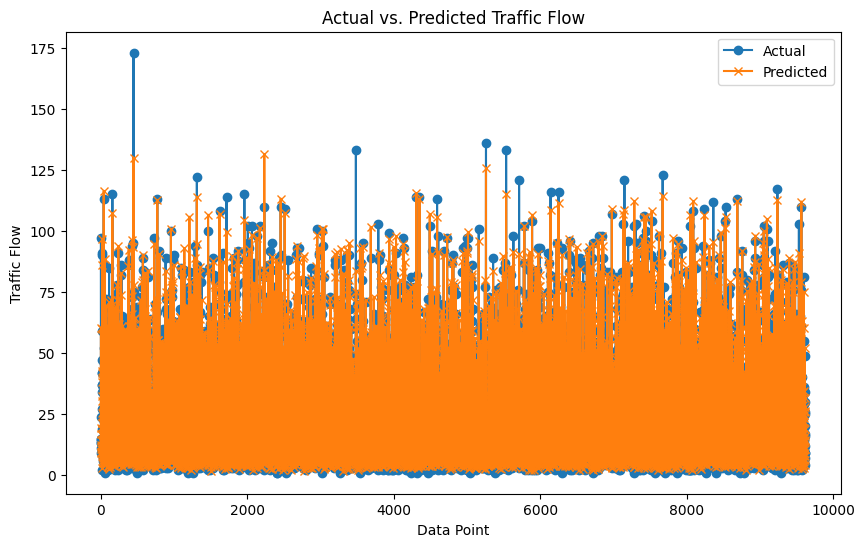

In [107]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow when data is not Normalized')
plt.legend()
plt.show()


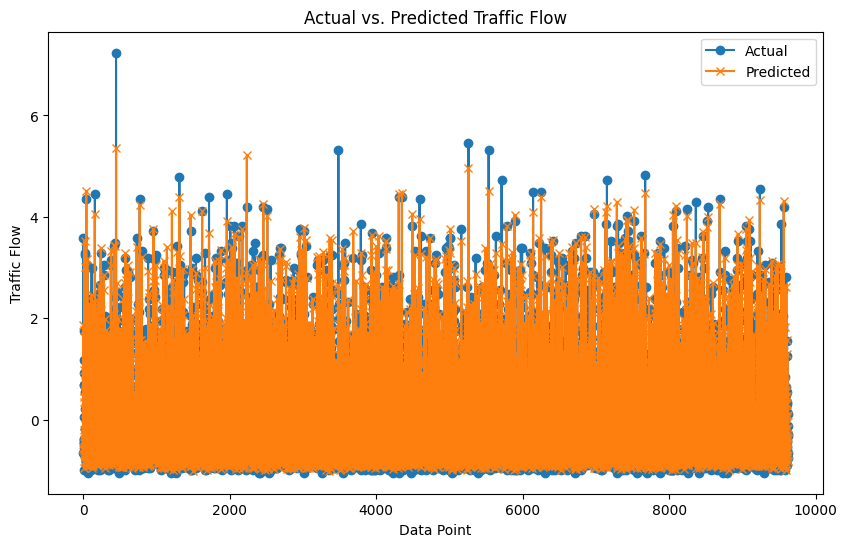

In [108]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test1)), y_test1, label='Actual', marker='o')
plt.plot(range(len(y_pred2)), y_pred2, label='Predicted', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow when data is Normalised')
plt.legend()
plt.show()